In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [5]:
df_evo = pd.read_csv('csv/Evolution_DataSets.csv')

# Seleccionar las especies de interés
especies_de_interes = ['Homo Neanderthalensis\n', 'Homo Erectus', 'Homo Sapiens', 'Homo Habilis', 'Homo Heidelbergensis']
df_especies_de_interes = df_evo[df_evo['Specie'].isin(especies_de_interes)]

# Seleccionar las características y la variable objetivo
features = ['Cranial_Capacity', 'Height']
target = ['Specie']
X = df_especies_de_interes[features].values
y = df_especies_de_interes[target].values.ravel()

print(X.shape) # Cantidad de muestras (filas) y características (columnas)
print(df_evo['Specie'].drop_duplicates()) # Especies en el df.

(2500, 2)
0                  hominino Orrorin tugenencin
1      hominino Ardipithecus ramidus / kabadda
2                   Australopithecus Afarensis
3                   Australopithecus Anamensis
4                   Australopithecus Africanus
5                            Homo Rodhesiensis
7           hominino Sahelanthropus tchadensis
8                      Homo Neanderthalensis\n
11                    Paranthropus Aethiopicus
12                                Homo Erectus
13                                 Homo Naledi
14                           Homo Floresiensis
16                         Paranthropus Boisei
18                            Homo Rudolfensis
20                                Homo Habilis
24                                Homo Sapiens
25                              Homo Antecesor
35                               Homo Ergaster
37                     Australopithecus Sediba
41                              Homo Georgicus
50              Australopithecus Bahrelghazali
52 

In [6]:
# Codificar las etiquetas de las especies como valores numéricos enteros
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
species_labels = label_encoder.inverse_transform(np.unique(y_encoded))

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y_encoded)

# Definir límites para el gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.5  # Densidad de la malla

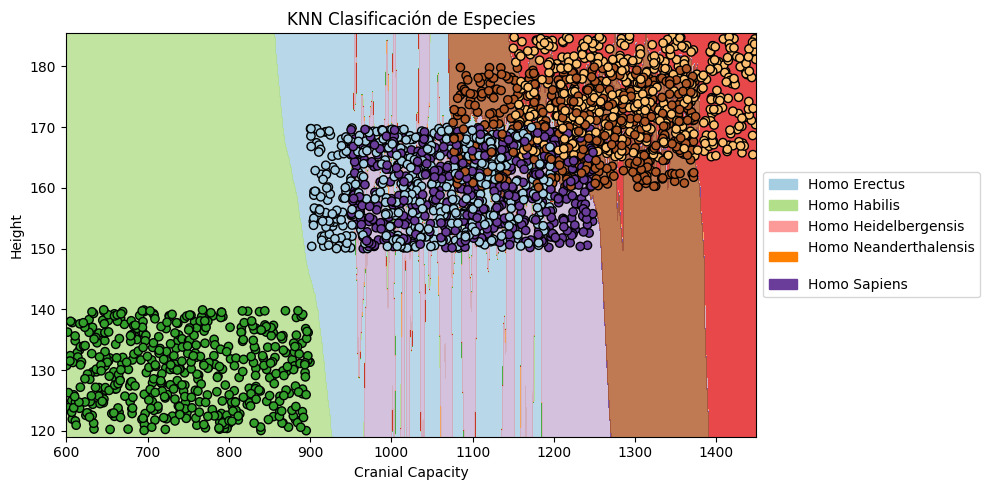

In [8]:
# Generar una malla de puntos para el gráfico
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Hacer predicciones para cada punto en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir las predicciones de vuelta a las etiquetas originales de las especies
Z_labels = label_encoder.inverse_transform(Z)
Z_encoded = label_encoder.transform(Z_labels)
# Reshape Z_encoded para que tenga la misma forma que xx y yy
Z_encoded = Z_encoded.reshape(xx.shape)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z_encoded, cmap=plt.cm.Paired, alpha=0.8)

# Crear la leyenda manualmente utilizando la paleta de colores predeterminada
legend_handles = [mpatches.Patch(color=plt.cm.Paired(i / len(species_labels)), label=species_labels[i]) for i in range(len(species_labels))]
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Graficar los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=plt.cm.Paired, edgecolors='k')

# Etiquetas y título del gráfico
plt.xlabel('Cranial Capacity')
plt.ylabel('Height')
plt.title('KNN Clasificación de Especies')

plt.tight_layout()
plt.show()